[*********************100%***********************]  3 of 3 completed


Date
2024-06-17         NaN
2024-06-18   -0.010985
2024-06-20   -0.021513
2024-06-21   -0.010444
2024-06-24    0.003133
                ...   
2024-12-10    0.004134
2024-12-11   -0.005166
2024-12-12    0.005964
2024-12-13    0.000686
2024-12-16    0.011728
Name: AAPL_Daily_Return, Length: 127, dtype: float64
Date
2024-06-17         NaN
2024-06-18   -0.004527
2024-06-20   -0.001434
2024-06-21    0.009154
2024-06-24   -0.004691
                ...   
2024-12-10   -0.006031
2024-12-11    0.012767
2024-12-12    0.001270
2024-12-13   -0.005094
2024-12-16    0.009659
Name: MSFT_Daily_Return, Length: 127, dtype: float64
Date
2024-06-17         NaN
2024-06-18   -0.012131
2024-06-20    0.006911
2024-06-21    0.018888
2024-06-24   -0.002283
                ...   
2024-12-10    0.055882
2024-12-11    0.055247
2024-12-12   -0.017605
2024-12-13   -0.011148
2024-12-16    0.036034
Name: GOOGL_Daily_Return, Length: 127, dtype: float64
Date
2024-06-17         NaN
2024-06-18   -0.009122
2024-06-20   -0

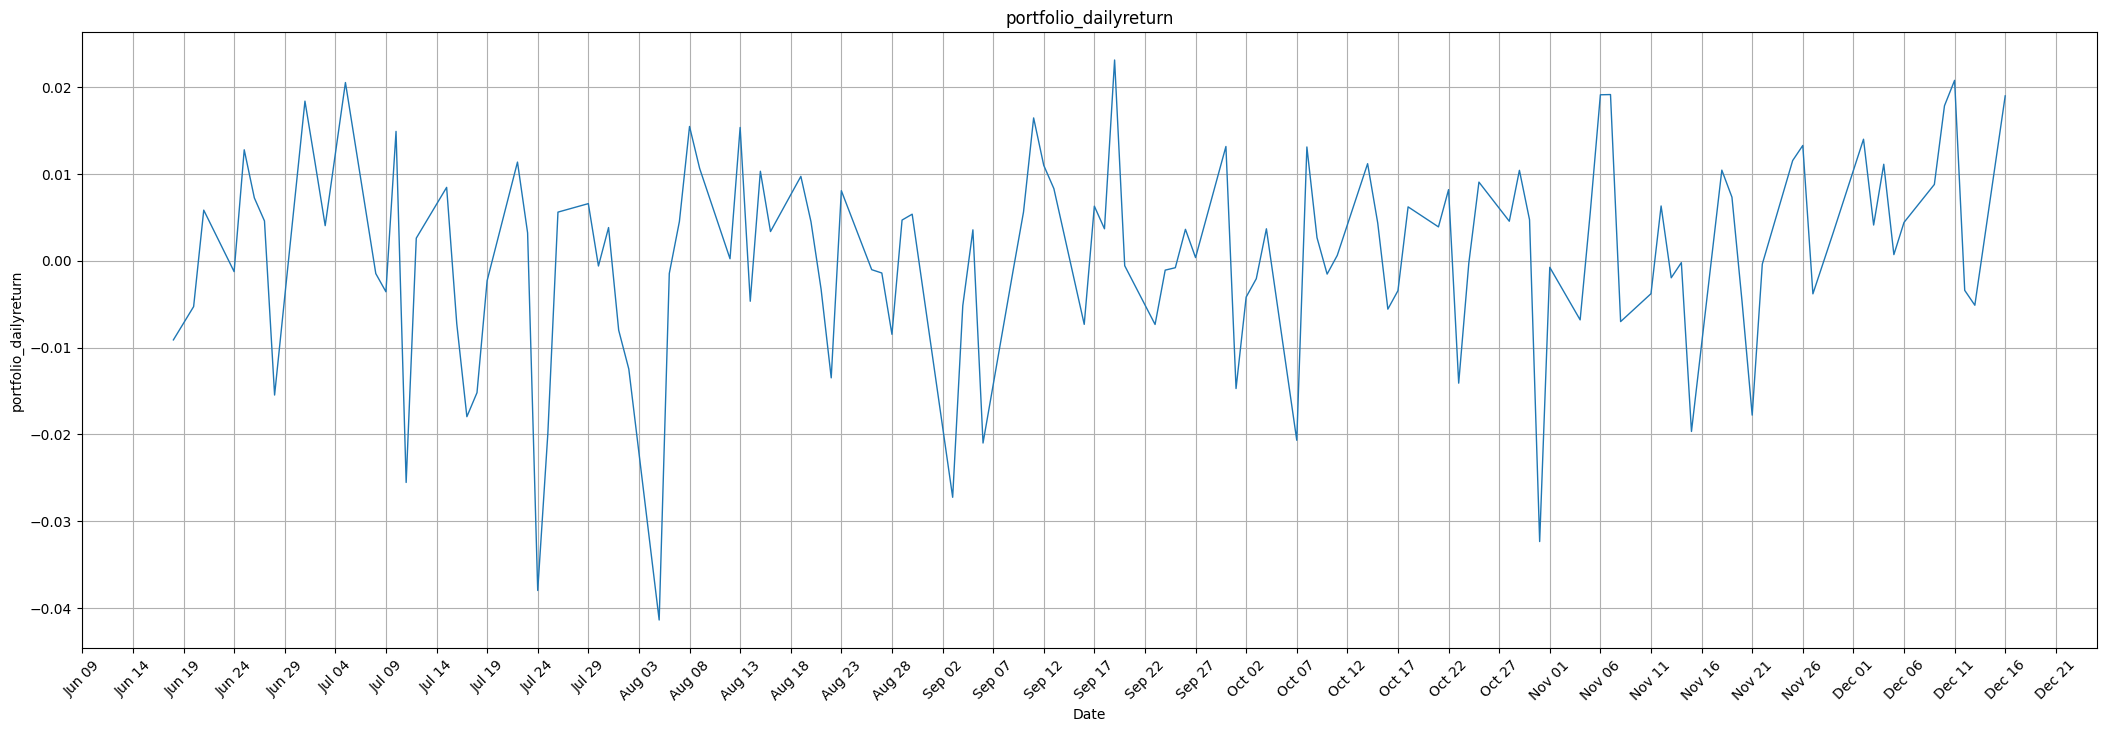

In [8]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

data = yf.download(tickers=["AAPL", "MSFT", "GOOGL"], period='6mo',interval='1d')

for ticker in ["AAPL", "MSFT", "GOOGL"]:
    data[f'{ticker}_Daily_Return'] = data['Adj Close'][ticker].pct_change()
    print(data[f'{ticker}_Daily_Return'])

data['portfolio_dailyreturn'] = 0.33 * data['AAPL_Daily_Return'] + 0.33 * data['MSFT_Daily_Return'] + 0.33 * data['GOOGL_Daily_Return']
print(data['portfolio_dailyreturn'])



data['cumulative_returns'] = (1 + data['portfolio_dailyreturn']).cumprod()

final_portfolio_value = 10000 * data['cumulative_returns'].iloc[-1]
print(final_portfolio_value)



plt.figure(figsize=(26, 8))

plt.plot(data.index,data['portfolio_dailyreturn'],linewidth='1',markersize=20,)

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))

plt.ylabel('portfolio_dailyreturn')
plt.xlabel('Date')
plt.title('portfolio_dailyreturn')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
